# Machine Learning: intro a sistemas de recomendação em Python
***
Projeto baseado no curso <strong>Alura - Machine Learning: intro a sistemas de recomendação em Python</strong>. Tem como objetivo criar um sistema de recomendação de filmes a partir da base de dados do Grouplens: https://grouplens.org/datasets/movielens/latest/.

O que foi aprendido?
- Como construir um sistema de recomendação
- KNN (K-Nearest Neighbors)

Palavras chaves: RecSys, KNN (K-Nearest Neighbors), Collaborative filtering, Content based filtering

#Heurística de recomendação e entendendo o que é colaboração
***

## 1. Suba os arquivos movies e ratings e transforme em dois dataframes

Para subir, basta fazer o upload dos arquivos .csv no link https://grouplens.org/datasets/movielens/latest/

In [ ]:
#Importando o pandas e transformando os arquivos em DataFrame
import pandas as pd

filmes = pd.read_csv('movies.csv')
notas = pd.read_csv('ratings.csv')

In [ ]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 2. Traduza suas colunas

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.columns = ['usuarioId' , 'filmeId', 'nota', 'marca_temporal']
notas.head()

,usuarioId,filmeId,nota,marca_temporal
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 3. Descreva os dataframes

In [ ]:
filmes.describe()

,filmeId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [ ]:
notas.describe()

,usuarioId,filmeId,nota,marca_temporal
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## 4. Desafio: recomendar um filme do nosso dataframe. Qual seria uma boa estratégia, mesmo não sabendo nada sobre as pessoas?

Apesar de não haver informações sobre as pessoas para quem vamos recomendar, é possível retirar informações importantes em relação aos nossos datasets. Uma delas é analisar os filmes mais votados, que podem ser classificados como boa amostra de filmes para recomendação.

## 5. Agrupe as notas pelo campo filmeId e conte quantas vezes ele aparece

In [ ]:
notas['filmeId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: filmeId, Length: 9724, dtype: int64

## 6. Defina o índice dos dataframes

In [ ]:
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


## 7. Crie uma variável com o total de votos

In [ ]:
total_votos = notas['filmeId'].value_counts()

## 8. Adicione uma coluna total de votos

In [ ]:
filmes['total_votos'] = total_votos
filmes.head()

,titulo,genero,total_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


## 9. Ordene os filmes baseado no total de votos de forma decrescente

In [ ]:
filmes.sort_values('total_votos', ascending = False).head()

,titulo,genero,total_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


# Total de votos, nota média e possíveis dificuldades de heurísticas simples

## 10. Qual a nota média de cada filme?


In [ ]:
notas.groupby('filmeId').mean()['nota']

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

## 11. Crie uma variável para as notas médias

In [ ]:
nota_media = notas.groupby('filmeId').mean()['nota']
nota_media

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

## 12. Crie uma coluna notas_medias

In [ ]:
filmes['nota_media'] = nota_media
filmes.head()

,titulo,genero,total_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


## 13. Ao invés de ordenar pelo total de votos, ordene pela nota média

In [ ]:
filmes.sort_values('nota_media', ascending = False)
filmes.head()

,titulo,genero,total_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


## 14. Qual o problema que enfrentamos na ordenação tanto no total de votos como de nota média?

Ordenando pelo total de votos, consideramos os filmes com maior voto e não necessariamente serem boas recomendações, justamente por terem notas médias ruins. Por outro lado, ordenando por notas médias, podemos ter filmes com nota alta mas com poucos votos, o que os tornam irrelevantes. Precisamos encontrar uma forma de recomendar filmes relevantes, ou seja, com muitos votos e com altas notas. 

## 15. Crie uma query para filtrar apenas os filmes com mais de 10 notas

In [ ]:
filmes_10 = filmes.query('total_votos > 10').sort_values('total_votos', ascending = True)
filmes_10.head()

,titulo,genero,total_votos,nota_media
filmeId,,,,
4326,Mississippi Burning (1988),Crime|Drama|Thriller,11.0,3.590909
107348,Anchorman 2: The Legend Continues (2013),Comedy,11.0,3.363636
694,"Substitute, The (1996)",Action|Crime|Drama,11.0,2.954545
4291,Nine to Five (a.k.a. 9 to 5) (1980),Comedy|Crime,11.0,2.727273
71464,"Serious Man, A (2009)",Comedy|Drama,11.0,3.227273


## 16. Crie uma mesma query mas agora com mais de 50 votos

In [ ]:
filmes_50 = filmes.query('total_votos > 50').sort_values('total_votos', ascending = True)
filmes_50.head()

,titulo,genero,total_votos,nota_media
filmeId,,,,
145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51.0,3.245098
1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51.0,4.039216
2100,Splash (1984),Comedy|Fantasy|Romance,51.0,3.117647
4239,Blow (2001),Crime|Drama,51.0,3.813725
4776,Training Day (2001),Crime|Drama|Thriller,51.0,3.794118


## 17. Quais concusões podemos tomar a partir das tentativas de ordenação?

Que devemos criar um mecanismo que recomende filmes relevantes com altas notas.

# Recomendação baseada em similaridade de gênero
***

## 18. Crie uma array dos filmes que você assistiu.

In [ ]:
assistido = [1, 7, 10, 18, 21]
assistido

[1, 7, 10, 18, 21]

## 19. Utilize iloc para selecionar os filmes.

In [ ]:
filmes.loc[assistido]

,titulo,genero,total_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
18,Four Rooms (1995),Comedy,20.0,3.700000
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382


## 20. Utilize uma query para encontrar filmes do gênero do último filme assistido.

In [ ]:
genero_assistido = filmes.query("genero == 'Comedy|Crime|Thriller'")

## 21. Ordene pela nota média.

In [ ]:
genero_assistido.sort_values('nota_media', ascending = False)

,titulo,genero,total_votos,nota_media
filmeId,,,,
33893,"Perfect Crime, The (Crimen Ferpecto) (Ferpect ...",Comedy|Crime|Thriller,1.0,4.500000
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239
118082,The Voices (2014),Comedy|Crime|Thriller,1.0,3.500000
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
2110,Dead Men Don't Wear Plaid (1982),Comedy|Crime|Thriller,18.0,3.305556
142961,Life Eternal (2015),Comedy|Crime|Thriller,1.0,2.500000
1689,"Man Who Knew Too Little, The (1997)",Comedy|Crime|Thriller,7.0,2.214286
7257,"Big Bounce, The (2004)",Comedy|Crime|Thriller,4.0,2.000000


## 22. Qual problema em ordenar apenas pela nota média e qual alternativa para isso?

O problema é que permanecem filmes muito pessoais, de nicho, com alta nota e poucos votos. Uma alternativa é selecionar apenas os filmes com mais de 50 votos.

In [ ]:
genero_assistido = filmes_50.query("genero == 'Comedy|Crime|Thriller'")
genero_assistido

,titulo,genero,total_votos,nota_media
filmeId,,,,
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914


In [ ]:
genero_assistido.sort_values('nota_media', ascending = False)

,titulo,genero,total_votos,nota_media
filmeId,,,,
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382


## 23. Utilize o drop para tirar os filmes que já assistimos.

In [ ]:
recomendacao = genero_assistido.drop(assistido, errors = 'ignore').sort_values('nota_media', ascending = False)
recomendacao

,titulo,genero,total_votos,nota_media
filmeId,,,,
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239


# Visão geral de abordagens de recomendação

## 24. O que é Collaborative filtering?

Recomendação a partir de informações de todos os usuários

## 25. O que é Content based filtering?

Recomendação a partir perfil de um usuário

# Definindo a distância euclidiana entre usuários

Vamos procurar usuários similares para recomendar filmes, através da distância entre euclidiana entre os usuários.

## 26. Crie duas listas com duas notas representando dois usuários fictícios.

In [ ]:
joao = [4, 4.5]
maria = [5, 5]

## 27. Construa um gráfico para plotar as notas de joao e maria. Adiocione legendas no plot.

Text(0.5, 1.0, 'Calculando a distância entre dois usuários')

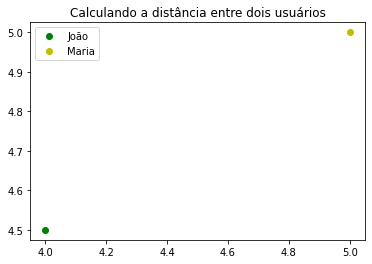

In [ ]:
import matplotlib.pyplot as plt

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['João', 'Maria'])
plt.title('Calculando a distância entre dois usuários')

## 28. Desenhe uma linha entre os pontos de forma que pareça um triângulo.

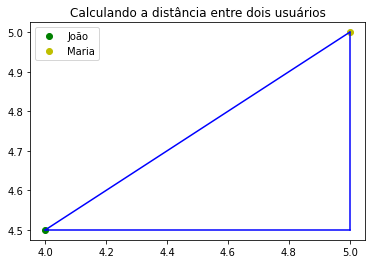

In [ ]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['João', 'Maria'])
plt.title('Calculando a distância entre dois usuários')
    
plt.plot([4, 5], [4.5, 4.5], color = 'blue', linestyle = '-')
plt.plot([4, 5], [4.5, 5], color = 'blue', linestyle = '-')
plt.plot([5, 5], [4.5, 5], color = 'blue', linestyle = '-')

## 29. Uma lista do Python não suporta operações aritméticas, portanto, utilize uma maneira de calcular a diferença entre as listas joao e maria.

In [ ]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

## 30. Faça uma função para calcular a fórmula de pitágoras entre joao e maria.

In [ ]:
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y  )

pitagoras(joao, maria)

1.118033988749895

## 31. Qual função do numpy para calcular a mesma fórmula?

In [ ]:
np.linalg.norm(joao - maria)

1.118033988749895

In [ ]:
# Melhorando a função criada

def pitagoras(a, b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

## 32. Adicione mais um usuário e nota no plot.

Text(0.5, 1.0, 'Calculando a distância entre dois usuários')

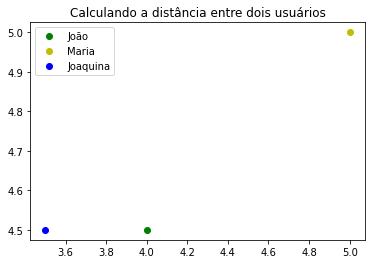

In [ ]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calculando a distância entre dois usuários')

## 33. Calcule as distâncias entre eles.

In [ ]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [ ]:
def distancia(a, b):
  return np.linalg.norm(a - b)

# Implementando a distância entre usuários no nosso dataset

Nessa etapa, vamos extrair as notas dos usuários para calcular as distâncias.

## 34. Filtre as notas do usuário 1.

In [ ]:
notas.query('usuarioId == 1')['nota']

0      4.0
1      4.0
2      4.0
3      5.0
4      5.0
      ... 
227    4.0
228    5.0
229    4.0
230    4.0
231    5.0
Name: nota, Length: 232, dtype: float64

## 35. A partir das notas, filtre também por filme.

In [ ]:
notas.query('usuarioId == 1')[['filmeId', 'nota']]

,filmeId,nota
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
227,3744,4.0
228,3793,5.0
229,3809,4.0
230,4006,4.0


## 36. Transforme o filmeId como índice.

In [ ]:
notas.query('usuarioId == 1')[['filmeId', 'nota']].set_index('filmeId')

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


## 37. Crie uma função para retornar as notas do usuário.

In [ ]:
#IMPORTANTE RELEMBRAR
def notas_usuario(id):
  usuario = notas.query('usuarioId == %d' % id)[['filmeId','nota']].set_index('filmeId')
  return usuario

notas_usuario(20)

,nota
filmeId,
2,3.0
8,1.0
13,4.0
34,4.0
48,5.0
...,...
6297,4.0
6333,4.0
6345,5.0


## 38. Crie duas variáveis, uma com as notas do usuário1 e outra com as notas do usuário 4.

In [ ]:
usuario1 = notas_usuario(1)
usuario4 = notas_usuario(4)

## 39. Utilizando o join, junte as duas variáveis em um dataframe.

Obs: o join, por padrão, junta um dataframe pelo índice.

In [ ]:
usuario1.join(usuario4)

ValueError: ignored

## 40. Como é possível resolver o problema da sobreposição do join?

In [ ]:
usuario1.join(usuario4, lsuffix = '_usuario1', rsuffix = '_usuario4')

,nota_usuario1,nota_usuario4
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


## 41. Tire as linhas NaN.

In [ ]:
join = usuario1.join(usuario4, lsuffix = '_usuario1', rsuffix = '_usuario4').dropna()
join

,nota_usuario1,nota_usuario4
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


## 42. Calcule a distância dos vetores do usuário1 e usuário4.

In [ ]:
distancia(join['nota_usuario1'], join['nota_usuario4'])

11.135528725660043

## 43. Crie uma função para o cálculo da distância entre dois usuários especificados pelo número Id.

Entendendo a função: 
1. Variáveis notas com a função notas_usuario
2. Join com as notas
3. Calcular a distância com a função *distancia*

In [ ]:
def distancia_usuarios(id1, id2):
  notas1 = notas_usuario(id1) 
  notas2 = notas_usuario(id2)
  join = notas1.join(notas2, lsuffix = 'id1', rsuffix = 'id2').dropna()
  distancia_usuarios = distancia(join['notaid1'], join['notaid2'])
  return [id1, id2, distancia_usuarios]

In [ ]:
distancia_usuarios(1, 4)

[1, 4, 11.135528725660043]

# Calculando a distância entre um e todos os usuários

## 44. Quantos usuários existem no dataset?

In [ ]:
quantidade_usuarios = len(notas['usuarioId'].unique())
print('A quantidade de usuários é de %d.' % quantidade_usuarios)

A quantidade de usuários é de 610.


## 45. Utilize um for para calcular as distâncias de todos os usuários.

In [ ]:
#Maneira imperativa
def distancia_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    info = distancia_usuarios(voce_id, usuario_id)
    distancias.append(info)
  return distancias

distancia_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

## 46. Faça a mesma função anterior de outra maneira.

In [ ]:
def distancia_todos(voce_id):
  todos_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_usuarios]
  return distancias

distancia_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

## 47. Crie um dataframe para retornar as distâncias.

In [ ]:
def distancia_todos(voce_id):
  todos_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

distancia_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# Ordenando usuários por distÂncia e lidando com casos extremos

## 48. Qual o problema de compararmos a distância de dois usuários desse forma?

Existirão linhas removidas pelo dropna que vão impactar na distância de usuários que não tem gostos em comum.

## 49. Como criar um algoritmo que distancia usuários que não tem nada em comum?

In [ ]:
def distancia_usuarios(id1, id2, minimo = 5):
  notas1 = notas_usuario(id1) 
  notas2 = notas_usuario(id2)
  join = notas1.join(notas2, lsuffix = 'id1', rsuffix = 'id2').dropna()
  
  if(len(join) < minimo):
    return [id1, id2, 100000]
  
  distancia_usuarios = distancia(join['notaid1'], join['notaid2'])
  return [id1, id2, distancia_usuarios]

## 50. Utilize a nova função para verificar se usuários que não tem algo em comum continuam próximos.

In [ ]:
distancia_todos(1).head(10)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


## 51. Ordene agora pela distância.

In [ ]:
def mais_proximos(voce_id):
  distancias = distancia_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  return distancias

mais_proximos(1).head(10)

,voce,outra_pessoa,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
48,1,49,1.000000
8,1,9,1.000000
257,1,258,1.000000
318,1,319,1.118034
397,1,398,1.224745


## 52. Retire você mesmo do dataframe.

In [ ]:
def mais_proximos(voce_id):
  distancias = distancia_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

mais_proximos(1).head(10)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
9,1,1.000000
258,1,1.000000
319,1,1.118034
398,1,1.224745


# Gerando recomendações baseado em um usuário

Chegou o momento de criar parâmetros para teste

## 53. Crie os parâmetros de teste.

In [ ]:
def mais_proximos(voce_id, n = None):
  distancias = distancia_todos(voce_id, n = n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
def distancia_todos(voce_id, n = None):
  todos_usuarios = notas['usuarioId'].unique()
  if n:
    todos_usuarios = todos_usuarios[:n]
  distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [ ]:
mais_proximos(1, n = 50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


## 54. Crie um algoritmo que tire as distâncias 100000.

In [ ]:
def distancia_usuarios(id1, id2, minimo = 5):
  notas1 = notas_usuario(id1) 
  notas2 = notas_usuario(id2)
  join = notas1.join(notas2, lsuffix = 'id1', rsuffix = 'id2').dropna()
  
  if(len(join) < minimo):
    return None
  
  distancia_usuarios = distancia(join['notaid1'], join['notaid2'])
  return [id1, id2, distancia_usuarios]

In [ ]:
def distancia_todos(voce_id, amostra = None):
  todos_usuarios = notas['usuarioId'].unique()
  if amostra:
    todos_usuarios = todos_usuarios[:amostra]
  distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [ ]:
def mais_proximos(voce_id, amostra = None):
  distancias = distancia_todos(voce_id, amostra = amostra)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
mais_proximos(1, amostra = 100)

,voce,distancia
outra_pessoa,,
77,1,0.000000
9,1,1.000000
49,1,1.000000
65,1,1.322876
90,1,1.414214
...,...,...
57,1,13.190906
91,1,13.518506
28,1,14.882876


## 55. Faça a função dos similares e mostre a sugestão final de filmes para o usuário 1.

In [ ]:
def sugere_para(voce, amostra = None):
  notas_de_voce = notas_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos(voce, amostra = amostra)
  similar = similares.iloc[0].name
  notas_do_similar = notas_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending = False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1).head()

,nota,titulo,genero,total_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# Finalizando uma implementação de KNN

Melhorando o algoritmo. Ao invés de sugerir a partir de uma pessoa, podemos calcular baseado em várias pessoas.

## 56. Refaça o algoritmo sugere_para de modo que a sugestão seja baseada em várias pessoas.

In [ ]:
def mais_proximos(voce_id, n_mais_proximos = 10, amostra = None):
  distancias = distancia_todos(voce_id, amostra = amostra)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(n_mais_proximos)

In [ ]:
def sugere_para(voce, n_mais_proximos = 10, amostra = None):
  notas_de_voce = notas_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos(voce, n_mais_proximos = n_mais_proximos ,amostra = amostra)
  usuarios_similares = similares.index
  usuarios_similares
  notas_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending = False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1).head()

,nota,titulo,genero,total_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


## 57. Altere para KNN.

In [ ]:
def knn(voce_id, k_mais_proximos = 10, amostra = None):
  distancias = distancia_todos(voce_id, amostra = amostra)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, amostra = None):
  notas_de_voce = notas_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos ,amostra = amostra)
  usuarios_similares = similares.index
  usuarios_similares
  notas_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending = False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1).head()

,nota,titulo,genero,total_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


# Filtro para recomendação

## 58. Teste os usuários.

In [ ]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max() + 1
  notas_usuario_novo = pd.DataFrame(dados, columns = ['filmeId', 'nota'])
  notas_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_usuario_novo])

In [ ]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,marca_temporal
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


## 59. Sugira para o usuário 611.

In [ ]:
sugere_para(611).head()

,nota,titulo,genero,total_votos,nota_media
filmeId,,,,,
171495,5.0,Cosmos,(no genres listed),2.0,4.500000
81847,5.0,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,24.0,3.916667
1873,5.0,"Misérables, Les (1998)",Crime|Drama|Romance|War,10.0,3.750000
8014,5.0,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,10.0,4.250000
103141,5.0,Monsters University (2013),Adventure|Animation|Comedy,16.0,3.875000


## 60. Utilize apenas filmes com mais de 50 votos.

In [ ]:
notas = notas.set_index('filmeId').loc[filmes_50.index]
notas.head()

,usuarioId,nota,marca_temporal
filmeId,,,
145,6,4.0,8.455540e+08
145,18,3.5,1.456864e+09
145,21,3.0,1.376823e+09
145,28,1.5,1.242291e+09
145,34,1.0,1.162048e+09


## 61. Resete o index

In [ ]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,marca_temporal
0,145,6,4.0,8.455540e+08
1,145,18,3.5,1.456864e+09
2,145,21,3.0,1.376823e+09
3,145,28,1.5,1.242291e+09
4,145,34,1.0,1.162048e+09


In [ ]:
sugere_para(611).head()

,nota,titulo,genero,total_votos,nota_media
filmeId,,,,,
112852,5.000000,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
74458,4.750000,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
71535,4.666667,Zombieland (2009),Action|Comedy|Horror,53.0,3.877358
300,4.500000,Quiz Show (1994),Drama,81.0,3.518519
1203,4.500000,12 Angry Men (1957),Drama,57.0,4.149123


# Mínimo de usuários com recomendações

## 62. Altere o algoritmo a ponto de que a média seja calculada com visualização de mais usuários por filme

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, amostra = None):
  notas_de_voce = notas_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos ,amostra = amostra)
  usuarios_similares = similares.index
  usuarios_similares
  notas_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_similares.groupby('filmeId').count()['nota']
  filtro_minimo = k_mais_proximos / 2

  recomendacoes = recomendacoes.join(aparicoes, lsuffix = '_media_usuarios', rsuffix = '_aparicoes_usuarios')
  recomendacoes = recomendacoes.query('nota_aparicoes_usuarios >= %.2f' % filtro_minimo)
  recomendacoes = recomendacoes.sort_values('nota_media_usuarios', ascending = False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  return recomendacoes.join(filmes)

In [ ]:
def knn(voce_id, k_mais_proximos = 10, amostra = None):
  distancias = distancia_todos(voce_id, amostra = amostra)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors = 'ignore')
  return distancias.head(k_mais_proximos)

In [ ]:
sugere_para(1, amostra = 500)

,nota_media_usuarios,nota_aparicoes_usuarios,titulo,genero,total_votos,nota_media
filmeId,,,,,,
318,4.75,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


In [ ]:
sugere_para(611).head(10)

,nota_media_usuarios,nota_aparicoes_usuarios,titulo,genero,total_votos,nota_media
filmeId,,,,,,
318,4.500000,8,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
919,4.400000,5,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,92.0,3.880435
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
356,4.350000,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
7361,4.312500,8,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
904,4.300000,5,Rear Window (1954),Mystery|Thriller,84.0,4.261905
593,4.222222,9,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
46578,4.214286,7,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117
4246,4.200000,5,Bridget Jones's Diary (2001),Comedy|Drama|Romance,65.0,3.623077


In [ ]:
sugere_para(611, amostra = 20).head(10)

,nota_media_usuarios,nota_aparicoes_usuarios,titulo,genero,total_votos,nota_media
filmeId,,,,,,
79132,4.600000,5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
47,4.600000,5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
1210,4.583333,6,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,196.0,4.137755
48516,4.500000,5,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
58559,4.400000,5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
296,4.333333,6,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
356,4.333333,6,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
2571,4.333333,6,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
7361,4.300000,5,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305


# Conclusao

Aprendemos como implementar um algoritmo de recomendação, popularmente chamado RecSys. Dessa forma, estamos aptos a construir algoritmos por trás dos panos. Há outras formas mais simples de implementar esses algoritmos, principalmente pela utilização da biblioteca surprise.